In [2]:
#from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import math 
import matplotlib.pyplot as plt
import numpy as np
import scipy.io


## The following cell Loads all the data necessary for the question

### All data file description
<strong>'treecovdata.nc'</strong> contains the datastructure that can plot the world map

<strong>'2023worldforestdata.mat'</strong>  contains all the past and current rainfall data (1999, 2014, 2100), as well as the past forest cover (1999). Moreover, this file also contains the latitudes and longitudes of the world map for plotting. Note: latitude and longitudes are described as (1 X N) array but in the cell below we convert it into a squeezed array

<strong> worldfixedpointdata.mat </strong> file contains the hysterisis/fixedpoint data of 3 continents.

The variable named <strong> fixedpointdata_xyz </strong>as a (K X 4) numpy array. 'K' represents the total number of fixed points. Each row contains the following 4 columns:
- column 1: the amount of rainfall
- column 2: minimum stable fixed point
- column 3: maximum stable fixed point (if none then it contains 'Nan')
- column 4: the unstable fixed point (if none then it contains 'Nan')

In [3]:
fname = './treecovdata.nc'
fname_mat = './2023worldforestrainfalldata.mat'
mat_file = scipy.io.loadmat(fname_mat)

rainfall1999 = mat_file['rainfall1999']
rainfall2014 = mat_file['rainfall2014']
rainfall2100 = mat_file['rainfall2100']
forest1999 = mat_file['forest1999']
lats = np.squeeze(mat_file['lats'], axis=0)
lons = np.squeeze(mat_file['lons'],axis=0)

In [4]:
fname_mat = './worldfixedpointdata.mat'
mat_file = scipy.io.loadmat(fname_mat)
fixedpointdata_southamerica = mat_file['fixedpointdata_southamerica']
fixedpointdata_africa = mat_file['fixedpointdata_africa']
fixedpointdata_aus = mat_file['fixedpointdata_aus']

## Above code has loaded all variables of interest into the given variables:

- rainfall1999
- rainfall2014
- rainfall2100

- forest1999
- lats
- lons
- fixedpointdata_southamerica
- fixedpointdata_africa
- fixedpointdata_aus

## Plotting the equilibrium/hysterisis curve of the three continents (from fixedpointdata_XYZ variables)

 - stable points are denoted by circle marker
 - unstable points are denoted by (+) markers

[[-25]]
[[25]]
[[75]]
[[125]]
[[175]]
[[225]]
[[275]]
[[325]]
[[375]]
[[425]]
[[475]]
[[525]]
[[575]]
[[625]]
[[675]]
[[725]]
[[775]]
[[825]]
[[875]]
[[925]]
[[975]]
[[1025]]
[[1075]]
[[1125]]
[[1175]]
[[1225]]
[[1275]]
[[1325]]
[[1375]]
[[1425]]
[[1475]]
[[1525]]
[[1575]]
[[1625]]
[[1675]]
[[1725]]
[[1775]]
[[1825]]
[[1875]]
[[1925]]
[[1975]]
[[2025]]
[[2075]]
[[2125]]
[[2175]]
[[2225]]
[[2275]]
[[2325]]
[[2375]]
[[2425]]
[[2475]]
[[2525]]


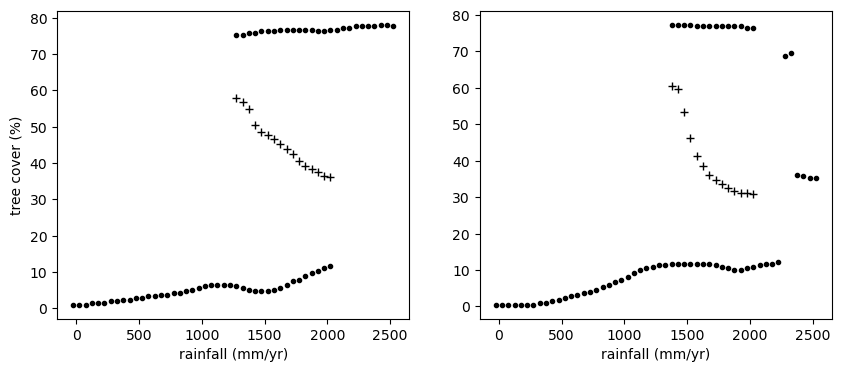

In [5]:
plt.figure(figsize=(10, 4))

nb_of_second_stable_sa=0
nb_of_second_stable_af=0
nb_of_second_stable_au=0
for i in range(fixedpointdata_aus.shape[0]):
    print(fixedpointdata_aus[i,0])
    plt.subplot(1,2,1) # South america
    plt.plot(fixedpointdata_southamerica[i,0], fixedpointdata_southamerica[i,1], 'k.')
    plt.plot(fixedpointdata_southamerica[i,0], fixedpointdata_southamerica[i,2], 'k.')
    plt.plot(fixedpointdata_southamerica[i,0], fixedpointdata_southamerica[i,3], 'k+')
    plt.ylabel('tree cover (%)')
    plt.xlabel('rainfall (mm/yr)')
    
    plt.subplot(1,2,2) # Africa 
    plt.plot(fixedpointdata_africa[i,0], fixedpointdata_africa[i,1], 'k.')
    plt.plot(fixedpointdata_africa[i,0], fixedpointdata_africa[i,2], 'k.')
    plt.plot(fixedpointdata_africa[i,0], fixedpointdata_africa[i,3], 'k+')
    plt.xlabel('rainfall (mm/yr)')
    
    # plt.subplot(1,3,3) # Australasia
    # plt.plot(fixedpointdata_aus[i,0], fixedpointdata_aus[i,1], 'k.')
    # plt.plot(fixedpointdata_aus[i,0], fixedpointdata_aus[i,2], 'k.')
    # plt.plot(fixedpointdata_aus[i,0], fixedpointdata_aus[i,3], 'k+')
    # plt.xlabel('rainfall (mm/yr)')


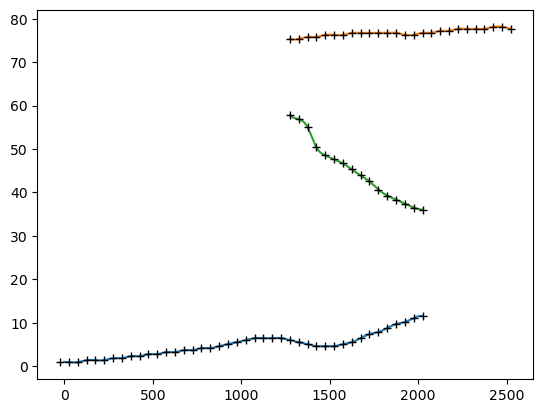

In [78]:
import numpy as np
from scipy.interpolate import CubicSpline as spline


def unpack(x):
    return x[0][0]

vunpack = np.vectorize(unpack)


x = vunpack(fixedpointdata_southamerica[:,0])
y = vunpack(fixedpointdata_southamerica[:,1:])

def create_eq(y, eq_min, eq_max):
        eq = np.full_like(y[:, 0], np.nan)
        eq[(y[:, 0] >= eq_min) & (y[:, 0] <= eq_max)] = y[(y[:, 0] >= eq_min) & (y[:, 0] <= eq_max), 0]
        eq[(y[:, 1] >= eq_min) & (y[:, 1] <= eq_max)] = y[(y[:, 1] >= eq_min) & (y[:, 1] <= eq_max), 1]
        eq[(y[:, 2] >= eq_min) & (y[:, 2] <= eq_max)] = y[(y[:, 2] >= eq_min) & (y[:, 2] <= eq_max), 2]
        return eq


eq1 = create_eq(y, 0, 20)
eq2 = create_eq(y, 20, 70)
eq3 = create_eq(y, 70, 100)


def create_function_eq(x, eq, high = False):
    x = x[~np.isnan(eq)]
    eq = eq[~np.isnan(eq)]
    uh = spline(x, eq)

    def f(z):
        if high: return np.nan if (z < x[0]) else uh(z)
        else : return np.nan if (z < x[0]) or (z > x[-1]) else uh(z)

    return np.vectorize(f)

f_eq1 = create_function_eq(x, eq1)
f_eq2 = create_function_eq(x, eq2)
f_eq3 = create_function_eq(x, eq3, high=True)



F = lambda z : np.array([f_eq1(z), f_eq3(z), f_eq2(z)])


xn = np.linspace(0, 2525, 10000)

plt.plot(xn, F(xn)[0, :])
plt.plot(xn, F(xn)[1, :])
plt.plot(xn, F(xn)[2, :])
plt.plot(x, eq1, "k.")
plt.plot(x, eq2, "k+")
plt.plot(x, eq3, "k.")

plt.show()




## To separately compute forest cover on each continent, we are providing the coordiantes of the 3 continents. These three continents vary only in their range of longitudes while the latitudes are constant across the data.

In [34]:
# longitudes of southamerica, africa and australia [lower boundary value, higher boundary value]
lons_sa = [-90, -30] # South america coordinates (longitude range)
lons_af = [-30, 60] # African coordinates (longitude range)
lons_au = [60, 160] # Australia coordinates (longitude range)       

In [64]:
# useful variables/functions to compute the forest cover of each continent in 2100

row,col=rainfall2100.shape

# we have values of R at equilibirum only for multiples of 25
def get_rainfall_index(r):
    available_rainfall = np.arange(-25,2526,50)  # from -25 to 2525 with step 50
    return np.argmin(np.abs(available_rainfall-r))

def unpack(T):
    return T[0][0]

vunpack = np.vectorize(unpack)



def compute_forest2100(fixedpointdata, Lons):
    forest2100=np.full((row,col),np.nan)
    for i in range (row):
        for j in range(col):
            if(Lons[0]<=lons[j]<=Lons[1]):
                if(np.isnan(rainfall2100[i,j])): continue
                index = get_rainfall_index(rainfall2100[i,j])
                T_arr = vunpack(fixedpointdata[index][1:3])
                T_arr = T_arr[np.logical_not(np.isnan(T_arr))]
                print(T_arr)
                T_init = forest1999[i,j]
                forest2100[i,j] = T_arr[np.abs(T_arr - T_init).argmin()]
     
            
    return forest2100


            




In [79]:
# Here compute the forest cover in south america, given the rainfall amount at 2100 and the hysterisis/equilibrium curve fixedpointdata_southamerica
forest2100_america=np.full((row,col),np.nan)
for i in range (row):
    for j in range(col):
        if(lons_sa[0]<=lons[j]<=lons_sa[1]):
            if(np.isnan(rainfall2100[i,j])): continue
            # index = get_rainfall_index(rainfall2100[i,j])
            T_arr = F(rainfall2100[i,j])
            # print(rainfall2100[i, j])
            T_arr = T_arr[np.logical_not(np.isnan(T_arr))]
            print(rainfall2100[i, j],T_arr)
            T_init = forest1999[i,j]
            forest2100_america[i,j] = T_arr[np.abs(T_arr - T_init).argmin()]
            # print(forest2100_america[i,j])
    
        

# print("\n\\n\n")
# forest2100=compute_forest2100(fixedpointdata_southamerica, lons_sa)
# forest2100_america=compute_forest2100(fixedpointdata_southamerica, lons_sa)
# NOTE: for computing the forest cover of south america, ignore what happens to the rest of the world. i.e., the rest-of-the-world map forest cover can be zeros or nan values

1226.739513640688 [6.46374373]
1648.5062381673158 [ 5.93001521 76.79083916 44.6330928 ]
1642.2739956873559 [ 5.81605394 76.79238689 44.80819599]
1556.9120221065828 [ 4.89729044 76.22143316 47.0664618 ]
1517.0893554334489 [ 4.59726532 76.30653038 47.75698934]
1452.497067497737 [ 4.60006027 76.06433334 49.04866526]
1452.497067497737 [ 4.60006027 76.06433334 49.04866526]
1042.965271887065 [6.20359972]
1017.89015143427 [5.93794754]
1017.89015143427 [5.93794754]
1042.8970609266362 [6.20287063]
1039.6765123176795 [6.16818918]
1020.2924811447082 [5.9618737]
1134.92192050978 [6.45987681]
1561.2072557772497 [ 4.94364176 76.22688446 46.98466065]
1508.6484728422631 [ 4.58877246 76.32923759 47.90976716]
1415.1301919745317 [ 4.68036247 75.79613023 51.21062107]
1375.3075253013978 [ 5.08214273 75.82010632 54.99178032]
1337.969434548057 [ 5.43621769 75.49588905 56.65003849]
1337.969434548057 [ 5.43621769 75.49588905 56.65003849]
974.8817280768644 [5.54666904]
971.9596752693742 [5.52011088]
971.9596752

## The cell below plots the forest cover in south america from the value provided in forest2100

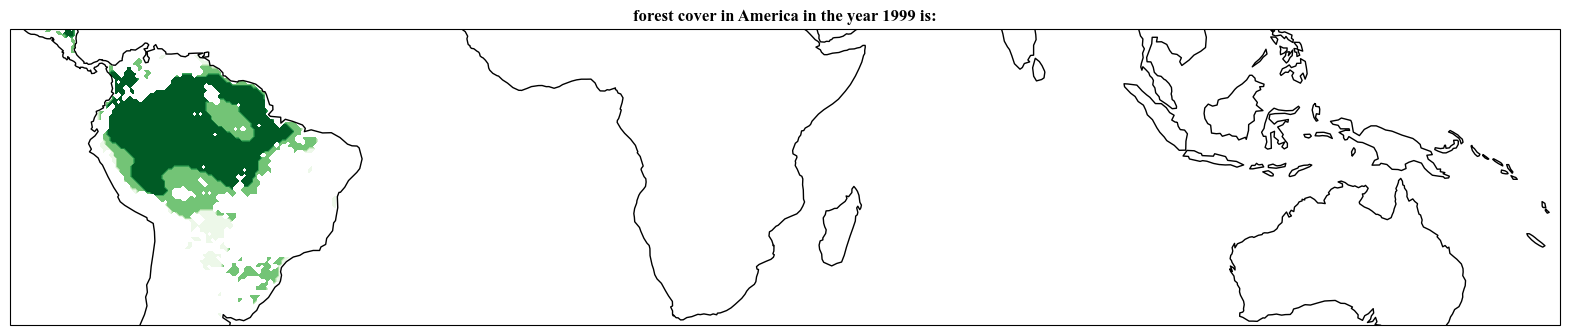

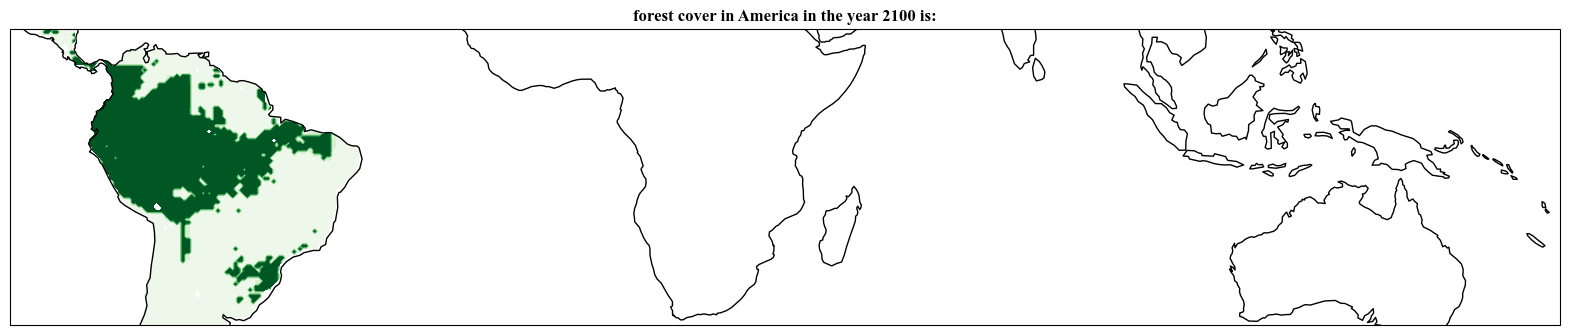

In [243]:
# forest1999_america=np.full((row,col),np.nan)
# mask = np.logical_and(lons >= lons_sa[0], lons <= lons_sa[1])
# forest1999_america[:, mask] = forest1999[:, mask]

# # Forest cover in 1999 in South America
# fig = plt.figure(figsize=(20, 20))
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([min(lons), max(lons), min(lats) , max(lats)], crs=ccrs.PlateCarree())
# cs=plt.contourf(lons, lats, forest1999_america, cmap='Greens')  
# # fig.colorbar(cs)
# plt.title('forest cover in America in the year 1999 is:', fontname="Times New Roman", fontweight="bold")
# ax.coastlines()   
    

# # Forest cover in 2100 in South America
# fig = plt.figure(figsize=(20, 20))
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([min(lons), max(lons), min(lats) , max(lats)], crs=ccrs.PlateCarree())
# cs=plt.contourf(lons, lats, forest2100, cmap='Greens')  
# # fig.colorbar(cs)
# plt.title('forest cover in America in the year 2100 is:', fontname="Times New Roman", fontweight="bold")
# ax.coastlines()   

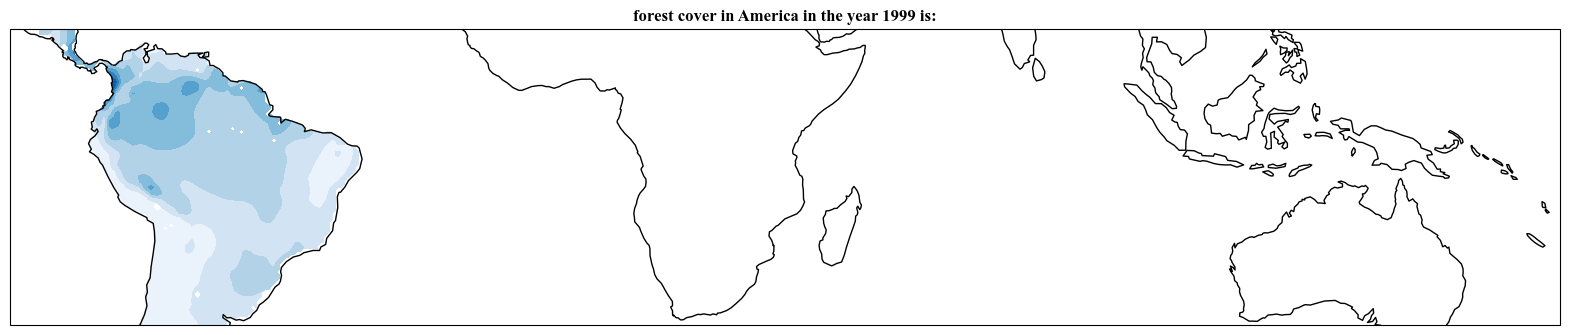

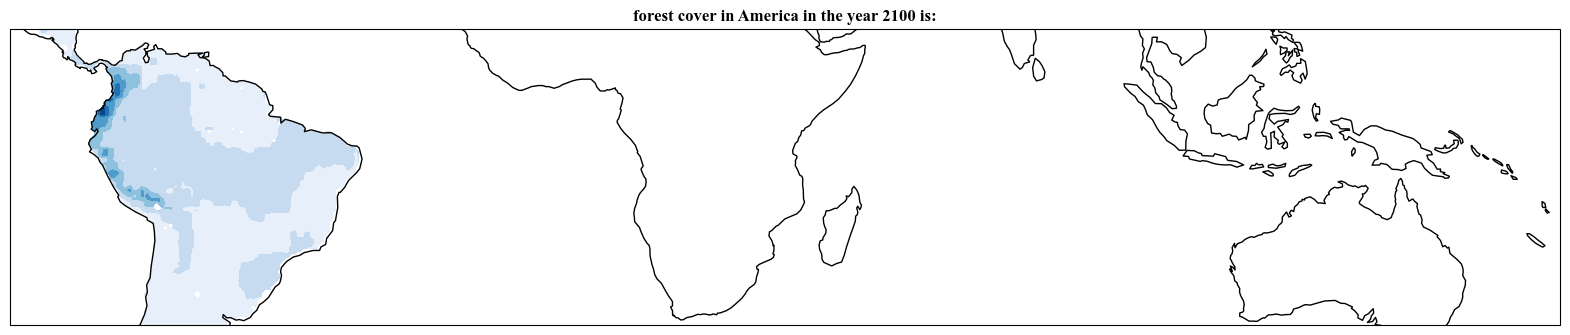

In [244]:
# rainfall1999_america=np.full((row,col),np.nan)
# rainfall2100_america=np.full((row,col),np.nan)

# mask = np.logical_and(lons >= lons_sa[0], lons <= lons_sa[1])
# rainfall1999_america[:, mask] = rainfall1999[:, mask]
# rainfall2100_america[:, mask] = rainfall2100[:, mask]
# # Forest cover in 1999 in South America
# fig = plt.figure(figsize=(20, 20))
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([min(lons), max(lons), min(lats) , max(lats)], crs=ccrs.PlateCarree())
# cs=plt.contourf(lons, lats, rainfall1999_america, cmap='Blues')  
# #fig.colorbar(cs)
# plt.title('forest cover in America in the year 1999 is:', fontname="Times New Roman", fontweight="bold")
# ax.coastlines()   
    

# # Forest cover in 2100 in South America
# fig = plt.figure(figsize=(20, 20))
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([min(lons), max(lons), min(lats) , max(lats)], crs=ccrs.PlateCarree())
# cs=plt.contourf(lons, lats, rainfall2100_america, cmap='Blues')  
# #fig.colorbar(cs)
# plt.title('forest cover in America in the year 2100 is:', fontname="Times New Roman", fontweight="bold")
# ax.coastlines()  

In [57]:
# Here compute the forest cover in africa, given the rainfall amount at 2100 and the hysterisis/equilibrium curve fixedpointdata_africa
# Place the computed forest cover in the variable named 'forest2100'

forest2100_africa=compute_forest2100(fixedpointdata_africa, lons_af) # stable equilibrium which is the closest to the intial value of T
    
# NOTE: for computing the forest cover of africa, ignore what happens to the rest of the world. . i.e., the rest-of-the-world map forest cover can be zeros or nan values

## The cell below plots the forest cover in africa from the value provided in forest2100

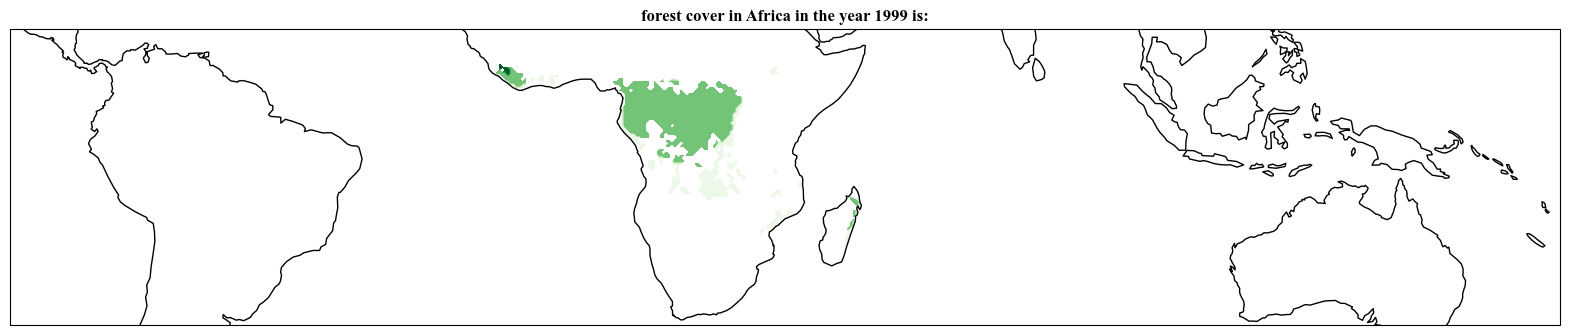

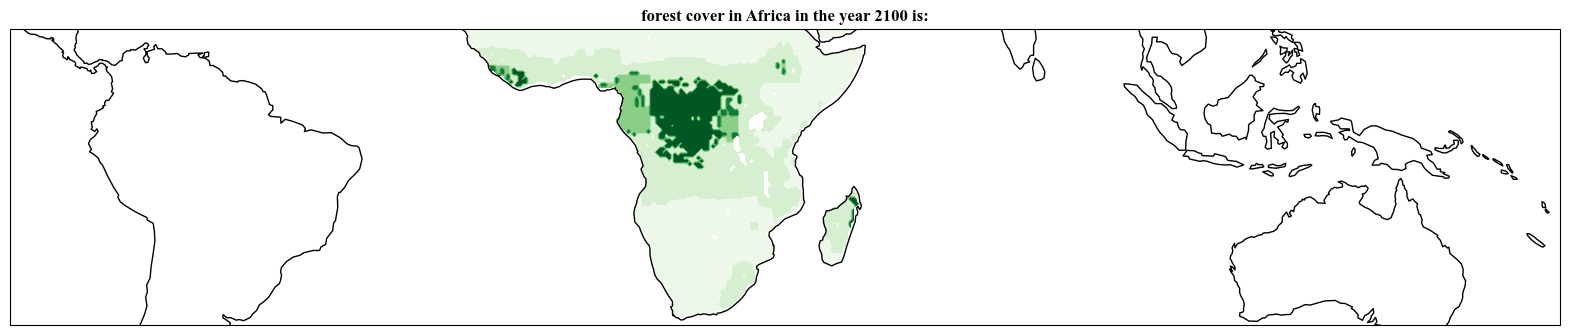

In [246]:
# forest1999_africa=np.full((row,col),np.nan)
# mask = np.logical_and(lons >= lons_af[0], lons <= lons_af[1])
# forest1999_africa[:, mask] = forest1999[:, mask]

# # Forest cover in 1999 in africa
# fig = plt.figure(figsize=(20, 20))
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([min(lons), max(lons), min(lats) , max(lats)], crs=ccrs.PlateCarree())
# cs=plt.contourf(lons, lats, forest1999_africa, cmap='Greens')  
# #fig.colorbar(cs)
# plt.title('forest cover in Africa in the year 1999 is:', fontname="Times New Roman", fontweight="bold")
# ax.coastlines()   
    
# # Forest cover in 2100 in africa
# fig = plt.figure(figsize=(20, 20))
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([min(lons), max(lons), min(lats) , max(lats)], crs=ccrs.PlateCarree())
# cs=plt.contourf(lons, lats, forest2100, cmap='Greens', vmin=0)  
# #fig.colorbar(cs)
# plt.title('forest cover in Africa in the year 2100 is:', fontname="Times New Roman", fontweight="bold")
# ax.coastlines()   

In [58]:
# Here compute the forest cover in australia+asia (australasia), given the rainfall amount at 2100 and the hysterisis/equilibrium curve fixedpointdata_aus
# Place the computed forest cover in the variable named 'forest2100'

forest2100_aus=compute_forest2100(fixedpointdata_aus, lons_au) # stable equilibrium which is the closest to the intial value of T
                    
# NOTE: for computing the forest cover of australasia, ignore what happens to the rest of the world. i.e., the rest-of-the-world map forest cover can be zeros or nan values

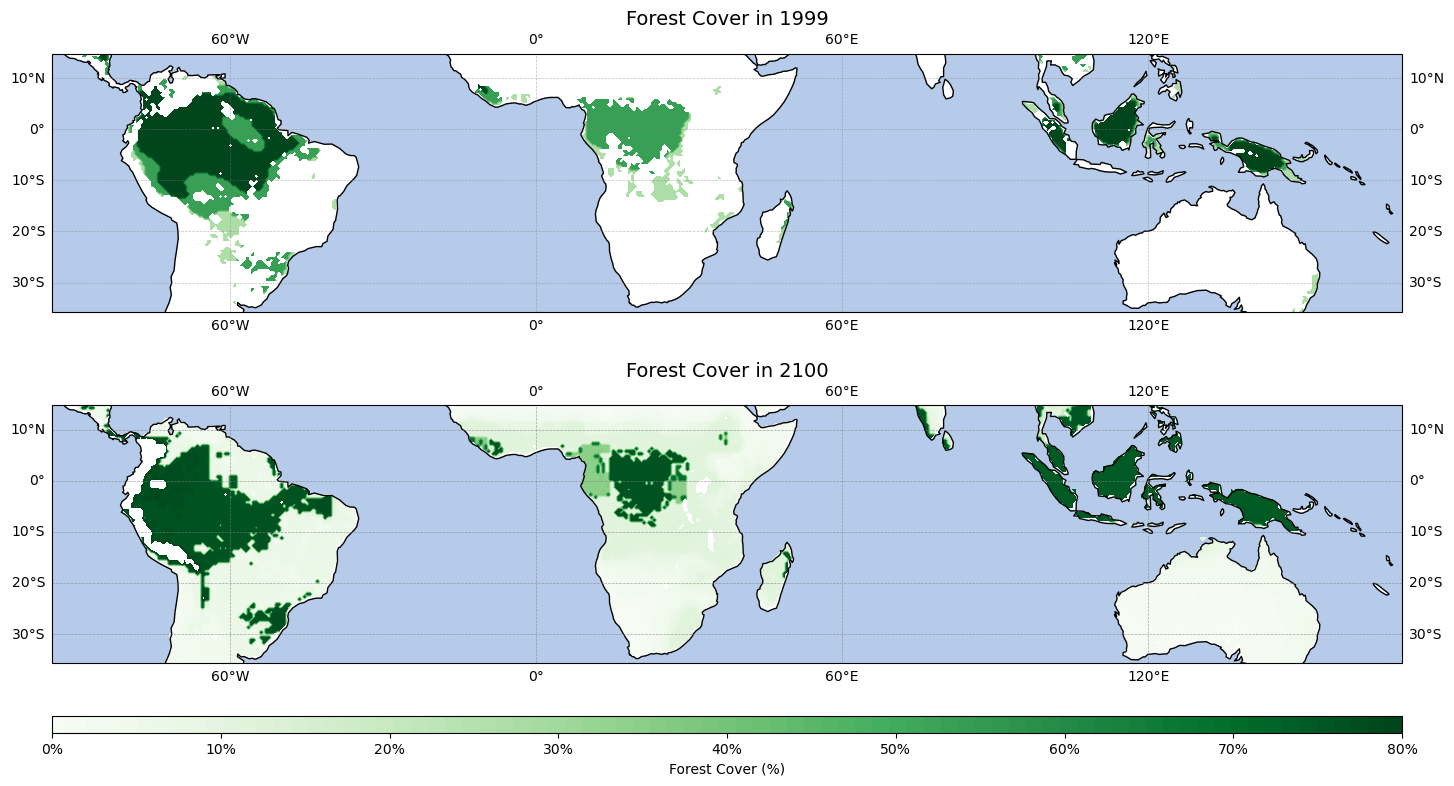

In [72]:
forest2100 = [forest2100_america, forest2100_africa, forest2100_aus]

# cmap = LinearSegmentedColormap.from_list(
#     'Custom cmap', ['#ffffff', '#e5f5e0', '#a1d99b', '#31a354'], N=256)
# Forest cover in 1999 in Australasia
fig = plt.figure(figsize=(15, 12))

gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 0.05], hspace=0.05)

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
# First subplot for the year 1999
ax1.set_extent([min(lons), max(lons), min(lats), max(lats)], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.OCEAN, alpha = .7)
cs1 = ax1.contourf(lons, lats, forest1999, cmap='Greens', vmin=0, vmax=80, levels=np.linspace(0, 80, 80))
ax1.set_title('Forest Cover in 1999', fontsize = 14)
ax1.coastlines(resolution='110m', color='black', linewidth=1)
ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Second subplot for the year 2100
ax2 = fig.add_subplot(gs[1], projection=ccrs.PlateCarree())
ax2.set_extent([min(lons), max(lons), min(lats), max(lats)], crs=ccrs.PlateCarree())
for forest in forest2100:
    cs2 = ax2.contourf(lons, lats, forest, cmap="Greens", vmin=0, vmax=80, levels=np.linspace(0, 80, 80))
ax2.add_feature(cfeature.OCEAN, alpha = 0.7)
ax2.set_title('Forest Cover in 2100', fontsize = 14)
ax2.coastlines(resolution='110m', color='black', linewidth=1)
ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')

cax = fig.add_subplot(gs[2])
cbar = plt.colorbar(cs2, cax=cax, orientation='horizontal', pad = 0.01)
cbar.set_label('Forest Cover (%)')
cbar_ticks = np.arange(0, 81, 10)  # Creates a list from 0 to 80 in steps of 10
cbar.set_ticks(cbar_ticks)  # Sets the positions of the ticks

# Optionally, set custom tick labels
cbar_ticklabels = [f'{tick}%' for tick in cbar_ticks]  # List comprehension to add '%' to each tick
cbar.set_ticklabels(cbar_ticklabels)  # Sets the text of the ticks
fig.subplots_adjust(top=0.95, bottom=0.35, left=0.05, right=0.95, hspace=0.02)
plt.show()

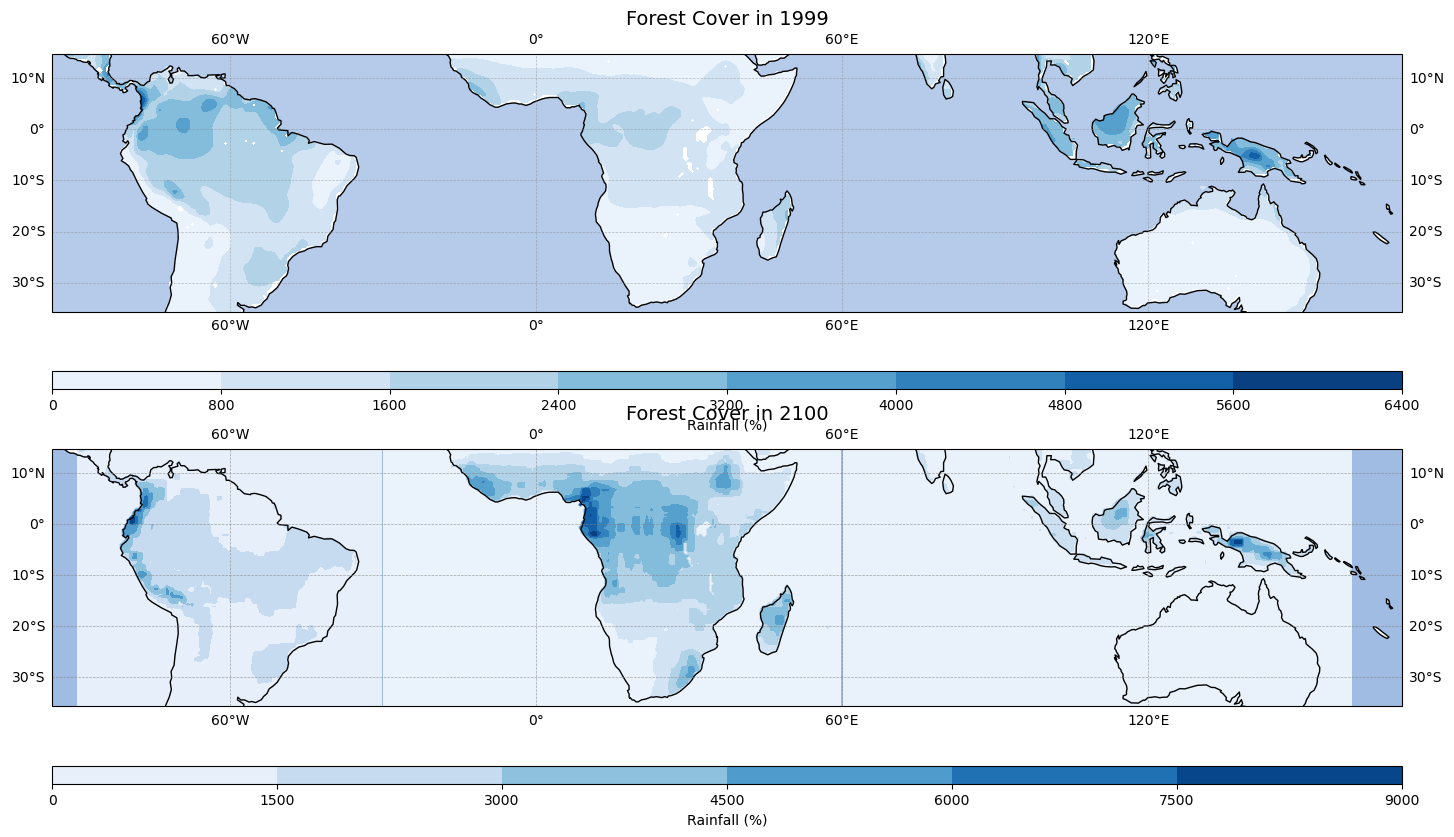

In [381]:
rainfall2100_aus = np.full((row,col),np.nan)
rainfall2100_af   = np.full((row,col),np.nan)
rainfall2100_am   = np.full((row,col),np.nan)
mask1 = np.logical_and(lons >= lons_au[0], lons <= lons_au[1])
mask2 = np.logical_and(lons >= lons_af[0], lons <= lons_af[1])
mask3 = np.logical_and(lons >= lons_sa[0], lons <= lons_sa[1])


rainfall2100_aus[:,mask1] = rainfall2100[:,mask1]
rainfall2100_af [:,mask2] = rainfall2100[:,mask2]
rainfall2100_am [:,mask3] = rainfall2100[:,mask3]

rainfall = [rainfall2100_aus, rainfall2100_af, rainfall2100_am]


fig = plt.figure(figsize=(15, 12))

gs = gridspec.GridSpec(4, 1, height_ratios=[1, 0.05, 1, 0.05], hspace=0.05)

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
# First subplot for the year 1999
ax1.set_extent([min(lons), max(lons), min(lats), max(lats)], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.OCEAN, alpha = .7)
cs1 = ax1.contourf(lons, lats, rainfall1999, cmap='Blues')
ax1.set_title('Forest Cover in 1999', fontsize = 14)
ax1.coastlines(resolution='110m', color='black', linewidth=1)
ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

cax = fig.add_subplot(gs[1])
cbar = plt.colorbar(cs1, cax=cax, orientation='horizontal')
cbar.set_label('Rainfall (%)')
# Second subplot for the year 2100
ax2 = fig.add_subplot(gs[2], projection=ccrs.PlateCarree())
ax2.set_extent([min(lons), max(lons), min(lats), max(lats)], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.OCEAN, alpha = .7)
for r in rainfall:
    cs2 = ax2.contourf(lons, lats, r, cmap="Blues")

ax2.add_feature(cfeature.OCEAN, alpha = 0.7)
ax2.set_title('Forest Cover in 2100', fontsize = 14)
ax2.coastlines(resolution='110m', color='black', linewidth=1)
ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')

cax = fig.add_subplot(gs[3])
cbar = plt.colorbar(cs2, cax=cax, orientation='horizontal')
cbar.set_label('Rainfall (%)')
# cbar_ticks = np.arange(0, 2535, 10)  # Creates a list from 0 to 80 in steps of 10
# cbar.set_ticks(cbar_ticks)  # Sets the positions of the ticks

# # Optionally, set custom tick labels
# cbar_ticklabels = [f'{tick}%' for tick in cbar_ticks]  # List comprehension to add '%' to each tick
# cbar.set_ticklabels(cbar_ticklabels)  # Sets the text of the ticks
fig.subplots_adjust(top=0.95, bottom=0.30, left=0.05, right=0.95, hspace=0.1)
plt.show()


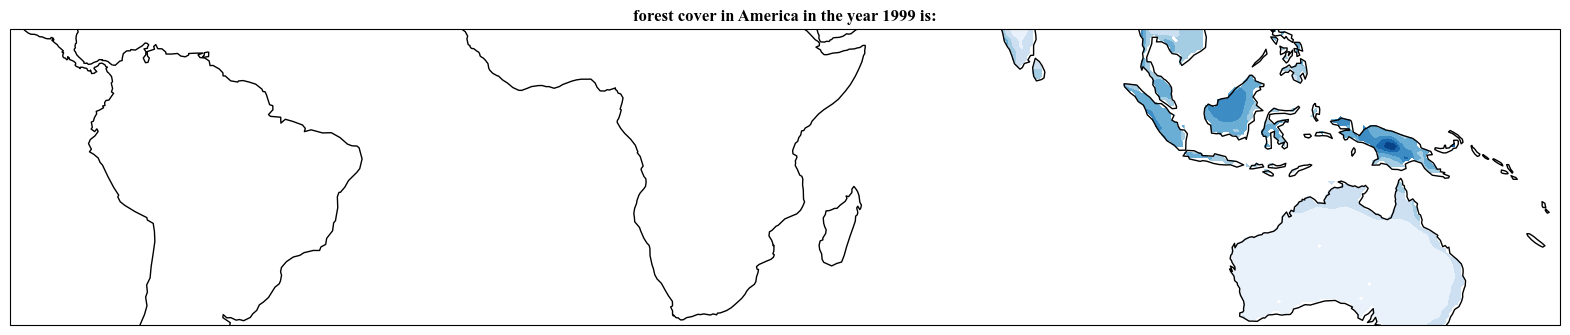

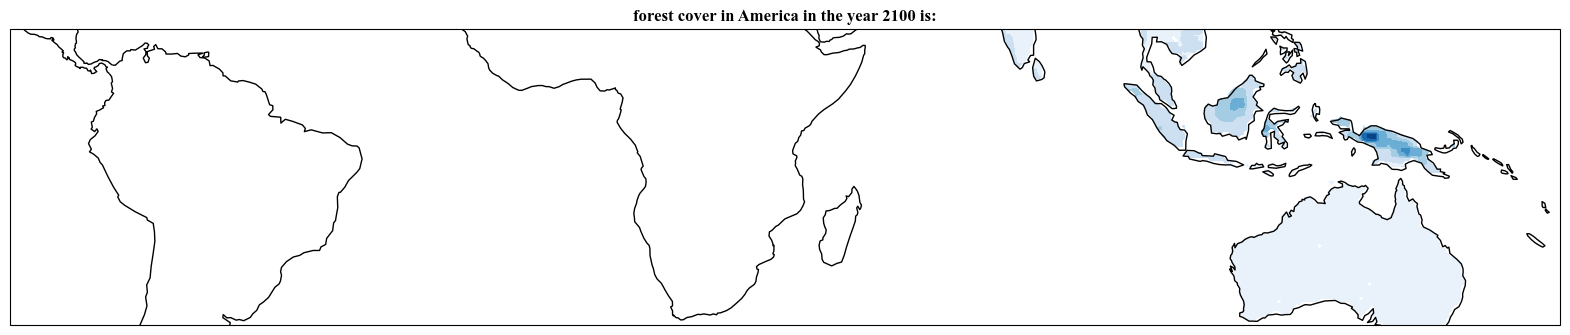

In [250]:
rainfall1999_aus=np.full((row,col),np.nan)
rainfall2100_aus=np.full((row,col),np.nan)

mask = np.logical_and(lons >= lons_au[0], lons <= lons_au[1])
rainfall1999_aus[:, mask] = rainfall1999[:, mask]
rainfall2100_aus[:, mask] = rainfall2100[:, mask]
# Forest cover in 1999 in South America
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([min(lons), max(lons), min(lats) , max(lats)], crs=ccrs.PlateCarree())
cs=plt.contourf(lons, lats, rainfall1999_aus, cmap='Blues')  
#fig.colorbar(cs)
plt.title('forest cover in America in the year 1999 is:', fontname="Times New Roman", fontweight="bold")
ax.coastlines()   
    

# Forest cover in 2100 in South America
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([min(lons), max(lons), min(lats) , max(lats)], crs=ccrs.PlateCarree())
cs=plt.contourf(lons, lats, rainfall2100_aus, cmap='Blues')  
#fig.colorbar(cs)
plt.title('forest cover in America in the year 2100 is:', fontname="Times New Roman", fontweight="bold")
ax.coastlines()  